In [1]:
import numpy as np
from matplotlib import pyplot as plt
pi = np.pi
e = np.e
sin = np.sin
cos = np.cos
log = np.log

In [2]:
def mean(X):
    return sum(X)/len(X)
def var(X):
    m = mean(X)
    return sum((x-m)**2 for x in X)/len(X)

In [3]:
def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m

glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)

In [4]:
%time
U(0,1)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


0.5977366255144033

In [5]:
def box_muller():
    U1, U2 = U(0,1), U(0,1)
    R = (-2*log(U1))**0.5
    theta = 2*pi*U2
    return R*cos(theta), R*sin(theta)

tries = 0
fails = 0
def marsaglia():
    global fails, tries
    while True:
        tries += 1
        U1, U2 = U(-1,1), U(-1,1)
        R = (U1**2+U2**2)**0.5
        if R<=1:
            U1/=R; U2/=R
            R = (-2*log(R*R))**0.5
            return U1*R, U2*R
        fails += 1

## Q1a,b,d: Box Muller

In [6]:
%time
N = 100
Xs = []
for i in range(N//2):
    x1,x2 = box_muller()
    Xs+=[x1,x2]
Xs = np.array(Xs)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [7]:
print(f"Sample mean for N={N}: {mean(Xs)}")
print(f"Sample  var for N={N}: {var(Xs)}")

Sample mean for N=100: 0.03402499506718052
Sample  var for N=100: 0.7343424929053762


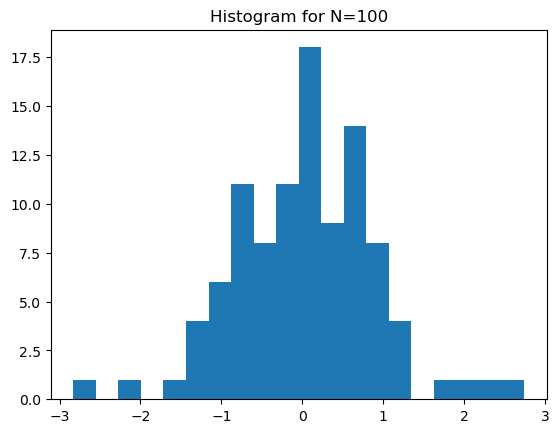

In [8]:
plt.title(f"Histogram for N={N}")
plt.hist(Xs, bins=20, align='mid')
plt.show()

In [9]:
%time
N = 10000
Xs = []
for i in range(N//2):
    x1,x2 = box_muller()
    Xs+=[x1,x2]  
Xs = np.array(Xs)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [10]:
print(f"Sample mean for N={N}: {mean(Xs)}")
print(f"Sample  var for N={N}: {var(Xs)}")

Sample mean for N=10000: -0.0006747730776638773
Sample  var for N=10000: 0.9836191390217686


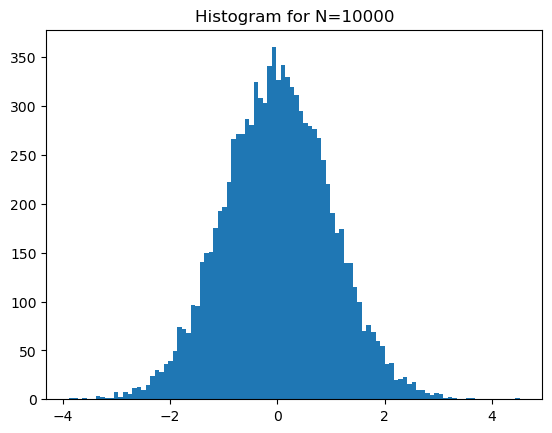

In [11]:
plt.title(f"Histogram for N={N}")
plt.hist(Xs, bins=100, align='mid')
plt.show()

## Q1e Box Muller

In [12]:
# pdf formulas: N(0,5) and N(5,5)
f_n05 = lambda x: 1/(10*pi)**0.5 * np.exp(-(x-0)**2/10)
f_n55 = lambda x: 1/(10*pi)**0.5 * np.exp(-(x-5)**2/10)

### The histograms have been scaled down by N to match density

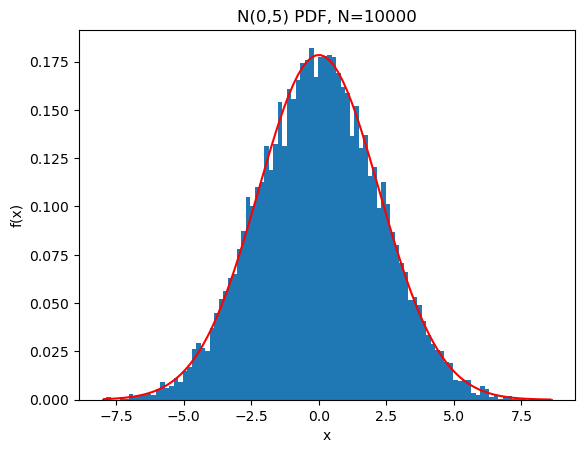

In [13]:
Xs = []
for i in range(5000):
    x1,x2 = box_muller()
    Xs+=[5**0.5*x1,5**0.5*x2]  
Xs = np.array(Xs)

y, x, _ = plt.hist(Xs,bins=100,density=True)
centers = (x[1:] + x[:-1]) / 2
plt.plot(centers, f_n05(centers), color='r')

#plt.hist(Xs,bins=100,density=True)


plt.title(f"N(0,5) PDF, N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
#plt.xlim(0,1); plt.ylim(0,3)
plt.show()

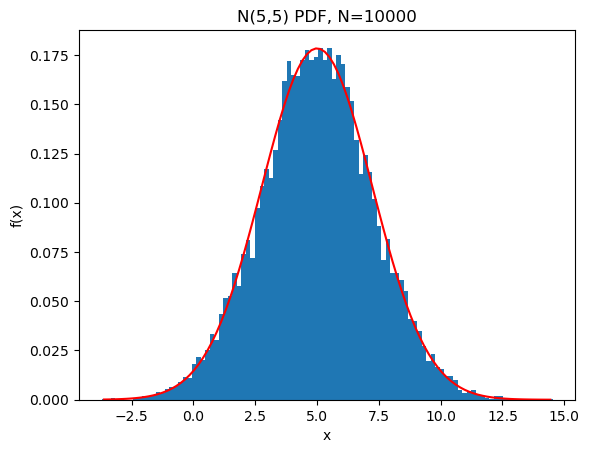

In [14]:
Xs = []
for i in range(5000):
    x1,x2 = box_muller()
    Xs+=[5**0.5*x1,5**0.5*x2]  
Xs = 5+np.array(Xs)

y, x, _ = plt.hist(Xs,bins=100,density=True)
centers = (x[1:] + x[:-1]) / 2
plt.plot(centers, f_n55(centers),color='r')

#plt.hist(Xs,bins=100,density=True)


plt.title(f"N(5,5) PDF, N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
#plt.xlim(0,1); plt.ylim(0,3)
plt.show()

 ## Q1: Marsaglia

In [15]:
%time
N = 100
Xs = []

tries = fails = 0
for i in range(N//2):
    x1,x2 = marsaglia()
    Xs+=[x1,x2]
Xs = np.array(Xs)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


In [16]:
print(f"Sample mean for N={N}: {mean(Xs)}")
print(f"Sample  var for N={N}: {var(Xs)}")

Sample mean for N=100: -0.10333169118554983
Sample  var for N=100: 0.8289230114403616


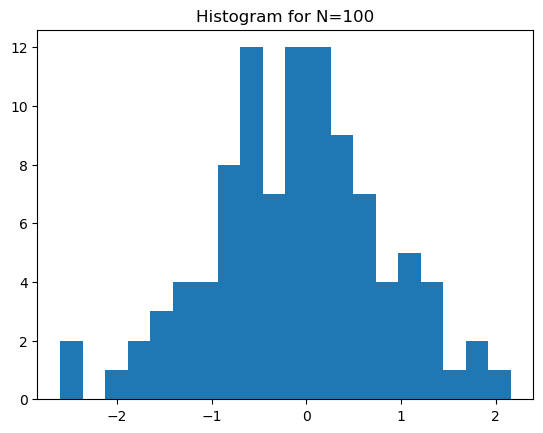

In [17]:
plt.title(f"Histogram for N={N}")
plt.hist(Xs, bins=20, align='mid')
plt.show()

In [18]:
print(f"Proportion rejected = {fails/tries}")
print(f"Meanwhile, 1-pi/4 = {1-pi/4}")

Proportion rejected = 0.2537313432835821
Meanwhile, 1-pi/4 = 0.21460183660255172


In [19]:
%time
N = 10000
Xs = []
tries = fails = 0
for i in range(N//2):
    x1,x2 = marsaglia()
    Xs+=[x1,x2]  
Xs = np.array(Xs)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [20]:
print(f"Sample mean for N={N}: {mean(Xs)}")
print(f"Sample  var for N={N}: {var(Xs)}")

Sample mean for N=10000: -0.0008408251651888867
Sample  var for N=10000: 0.990459911721987


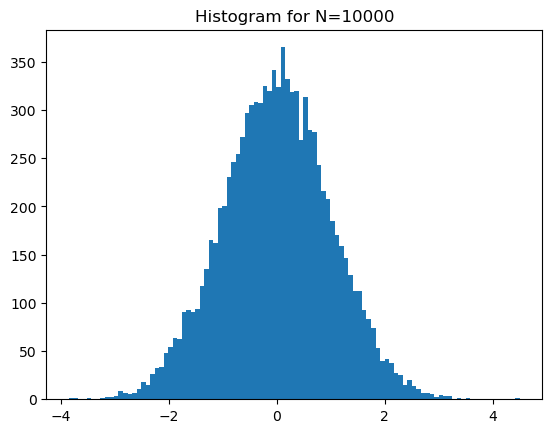

In [21]:
plt.title(f"Histogram for N={N}")
plt.hist(Xs, bins=100, align='mid')
plt.show()

In [22]:
print(f"Proportion rejected = {fails/tries}")
print(f"Meanwhile, 1-pi/4 = {1-pi/4}")

Proportion rejected = 0.20848504036726295
Meanwhile, 1-pi/4 = 0.21460183660255172


## Q1e Marsaglia

### The histograms have been scaled down by N to match density

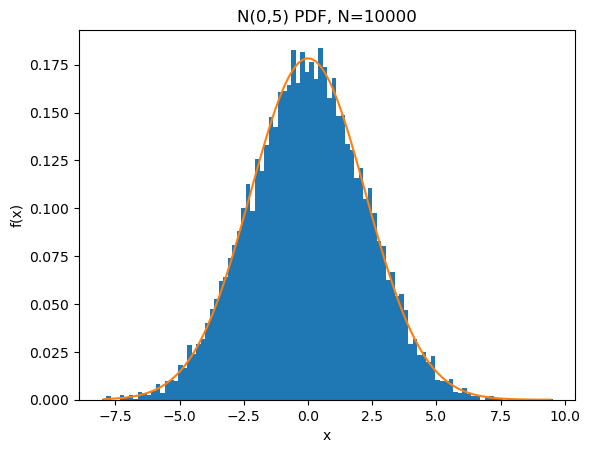

In [23]:
Xs = []
for i in range(5000):
    x1,x2 = box_muller()
    Xs+=[5**0.5*x1,5**0.5*x2]  
Xs = np.array(Xs)

y, x, _ = plt.hist(Xs,bins=100,density=True)
centers = (x[1:] + x[:-1]) / 2
plt.plot(centers, f_n05(centers))

#plt.hist(Xs,bins=100,density=True)


plt.title(f"N(0,5) PDF, N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
#plt.xlim(0,1); plt.ylim(0,3)
plt.show()

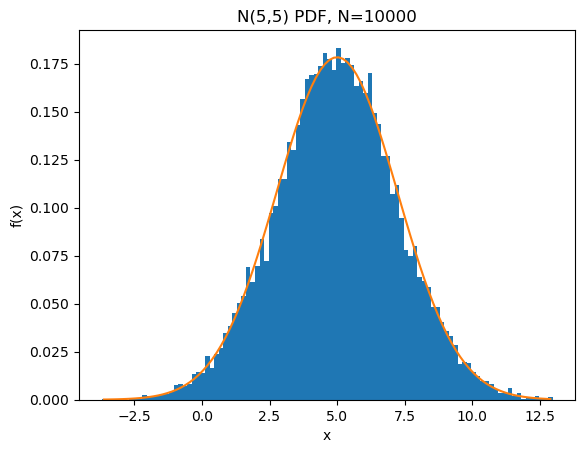

In [24]:
Xs = []
for i in range(5000):
    x1,x2 = box_muller()
    Xs+=[5**0.5*x1,5**0.5*x2]  
Xs = 5+np.array(Xs)

y, x, _ = plt.hist(Xs,bins=100,density=True)
centers = (x[1:] + x[:-1]) / 2
plt.plot(centers, f_n55(centers))

#plt.hist(Xs,bins=100,density=True)


plt.title(f"N(5,5) PDF, N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
#plt.xlim(0,1); plt.ylim(0,3)
plt.show()

## Observations

Q1b: Clearly Box-Muller was faster than Marsaglia and Bray.

Q1c: The reject fraction is approx equal to $1-\pi/4$

Q1e: Plot of N(0,5) is a sharper peak than N(0,1). 
Plot of N(5,5) is almost same as N(0,5), only shifted to 5 units right

# Q2

## I'll generate uniform dist on $[-M,M]\times[0,1]$ and measure the fraction that falls under curve

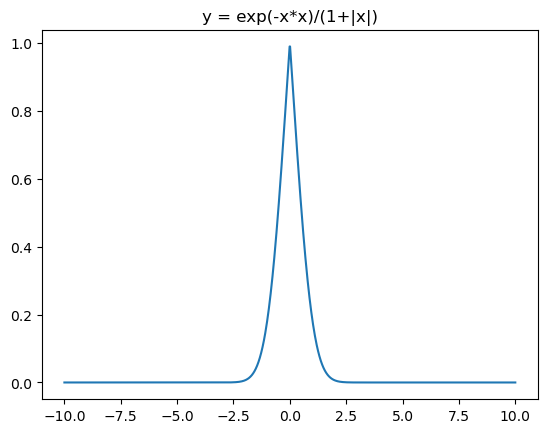

In [25]:
f = lambda x: np.exp(-x*x)/(1+abs(x))
X = np.linspace(-10,10,1000)
# M = 10 will work, but I'll take 50 for more accuracy

plt.title("y = exp(-x*x)/(1+|x|)")
plt.plot(X,f(X))
plt.show()

### Area of box $[-M,M]\times[0,1] = 2M sq.units$
### Fraction of points under curve $=good/N$
### Therefore, approx area $=2M\cdot good/N$

In [26]:
N = 10**6
good = 0
M = 50
for i in range(N):
    x = U(-M,M)
    y = U(0,1)
    if y<f(x): good+=1
area = 2*M*good/N
area

1.2218

### So the area is around 1.22 square units